# Problem : 01 : Bangla Handwritten digit recognition

In problem 1 we used **"NamtaDB**" dataset to identify Bangla handwritten digits from 0 to 9. Here **Deep neural Network** is used to build a multiclassification model of supervised learning. 

**NumtaDB samples example**

<div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>

- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 10**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

The NamtaDB dataset has total of **60k** data samples. Then the dataset is divided into **90:10** = train : test set using sckitlearn library. 

For this particular problem we have used *different hyperparameters* like - batch size, number of iterations, learning rate , optimizer etc to get the best results. The combination of hyperparameters and their acquired accuracy is given below - 

| Hyperparameters| Setting 1| Setting 2  | Setting 3 | Setting 4  |
| :-------------:| :------: | :--------: | :-------: | :--------: | 
| Batch size     |    100   |    256      |    526     |    1024     |
| No. of iterations|  3000  |    3000    |    5000   |    10000    |
| Epoch          |    5.46  |    13.98    |    47.89   |    186.49   |
| Learning Rate  |    0.1 |    0.1   |    0.0005  |    0.0005   |
| Optimizer      |    SGD   |    Adam     |    Adam    |    Adamax     |
| No of hidden Layers| 1  |    2     |    2    |    3     |
| No of hidden neurons  |    100   |    256    |    128,64   |    256,128     |
| Activation function|Tanh   |    Tanh,ReLU6     |    ReLU6,ReLU    |  Tanh,ReLU6,ReLU     |
| ***Accuracy*** |   32.307 |    63.922  |    76.197 |    82.189  |

                                                    Table : Results of different hyperparameters. 


In this problem different hyperparameter setup is used to see the **effect** of hyperparameters on the results of model which we can see in the above table. 

**Setting-1** has basic setup of hyperparameters. The batch size is **100** with **3000** iterations and **5.46** epochs. The learning rate is starting at **0.1** and **SGD** optimizer is used. For deep neural network here only one hidden layer is used with 100 neurons. It goes through Tanh actvation function.This basic model has an accuracy of **32.307** which is not quite satisfying. 

In **Setting-2** I have increased the batch size to **256** and the learning rate is same. After experimenting many setups it is seen that **Adam** optimizer works better than other optimizers for this problem. Therefore along with using Adam optimizer I have increased the no. of hidden layers to **2** and also the no. of hidden layer neurons to **256**. For these two layers two *different activation functions* - **Tanh and ReLU6** is used. Tanh works *better* than sigmoid and ReLU here and even ReLU6 works better than ReLU and SiLU. As a result a prominant increase in accuracy is seen which is **63.922%**. 

**Setting-3** has a **bigger** batch size to learn with big steps and the no of iterations are also increased to **5000** . After *several* setups it can be concluded that the model works best with **very small** learning rates. So here learning rate is set to **0.005** and the no. of hidden layer neurons is varied with **128** and **64** . For activation **ReLU6 and ReLU** is used. After **47.89** epochs the model has an accuracy of **76.197%**. 

After inreasing the batch size more the model performs better. So in this **Setting -4** the batch size is increased to **1024** and the number of iterations is also increased to **10000** with 186.49 epochs. For more epochs the model learns better. The **Adamax** optimizer is used here and the network is made more *deep* with **3** hidden layers.  The hidden neurons are varied here with **256->256 and 128** neurons on 1st,2nd and 3rd layer. Each layer has different activation functions. The previous activation functions which performed best i.e **Tanh,ReLU6,ReLU** is used here. With this setting the model gives an accuracy of **82.189%**. This is the best result among all the settings. But is iterations are more increased then the model gets overfitted. 

So we can come to a conclusion that with proper tuning of the hyperparameters this multiclassification model with Deep neural network can perform better. 

##Implementation :

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import PIL
#from google.colab import drive
#drive.mount('/drive')

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle


# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d BengaliAI/numta

kaggle.json
 99% 1.89G/1.91G [00:25<00:00, 63.7MB/s]
100% 1.91G/1.91G [00:25<00:00, 81.3MB/s]


In [ ]:
!mkdir numtaDB
!unzip -q numta.zip -d numtaDB

In [ ]:
a_csv = pd.read_csv('numtaDB/training-a.csv', usecols=['filename','digit'])
b_csv = pd.read_csv('numtaDB/training-b.csv', usecols=['filename','digit'])
c_csv = pd.read_csv('numtaDB/training-c.csv', usecols=['filename','digit'])
d_csv = pd.read_csv('numtaDB/training-d.csv', usecols=['filename','digit'])
e_csv = pd.read_csv('numtaDB/training-e.csv', usecols=['filename','digit'])
a_csv.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
frames = [a_csv,c_csv,d_csv]
dataset = pd.concat(frames,ignore_index=True)
print(len(dataset))

54908


In [ ]:
dataset.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [ ]:
!mkdir numtaDBDataset

import shutil
import os
from os import path
def completeDataset(folder_name):
  src = 'numtaDB/' + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, 'numtaDBDataset')  
      
completeDataset('training-a')
print('A Done')
#completeDataset('training-b')
#print('B Done')
completeDataset('training-c')
print('C Done')
completeDataset('training-d')
print('D Done')
#completeDataset('training-e')
#print('E Done')

A Done
C Done
D Done


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, images_folder, transform = None):
        self.df = df
        self.images_folder = images_folder
        self.transform = transform
        

    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
        filename = self.df['filename'][index]
        label = self.df['digit'][index]
        image = PIL.Image.open(os.path.join(self.images_folder, filename)).convert('L')
        if self.transform is not None:
            image = self.transform(image)
        return image, label
        

In [ ]:
fullDataset = CustomDataset(dataset, 'numtaDBDataset',train_transform)

print(len(fullDataset))

54908


In [ ]:
fullDataset[0]

(tensor([[[ 0.6392,  0.6392,  0.6392,  0.6392,  0.6471,  0.6392,  0.6392,
            0.6471,  0.6392,  0.6392,  0.6471,  0.6392,  0.6314,  0.6314,
            0.6392,  0.6314,  0.6235,  0.6314,  0.6392,  0.6314,  0.6314,
            0.6314,  0.6392,  0.6392,  0.6471,  0.6471,  0.6471,  0.6471],
          [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6471,
            0.6471,  0.6471,  0.6471,  0.6392,  0.6392,  0.6392,  0.6392,
            0.6314,  0.6314,  0.6314,  0.6314,  0.6392,  0.6392,  0.6471,
            0.6471,  0.6392,  0.6392,  0.6392,  0.6392,  0.6392,  0.6471],
          [ 0.6471,  0.6471,  0.6471,  0.6471,  0.6471,  0.6549,  0.6549,
            0.6471,  0.6549,  0.6471,  0.6392,  0.6471,  0.6471,  0.6392,
            0.6392,  0.6392,  0.6314,  0.6314,  0.6392,  0.6392,  0.6392,
            0.6392,  0.6392,  0.6392,  0.6392,  0.6314,  0.6471,  0.6471],
          [ 0.6471,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,  0.6549,
            0.6549,  0.6549,  0.647

In [ ]:
from sklearn.utils import shuffle
fullDataset = shuffle(fullDataset)

In [ ]:
# split into train test sets
train_dataset, test_dataset = train_test_split(fullDataset, test_size = 0.1)
print(len(train_dataset))
print(len(test_dataset))

49417
5491


In [ ]:
print(train_dataset[51][0].size())
print(train_dataset[51][0].numpy().shape)

torch.Size([1, 28, 28])
(1, 28, 28)


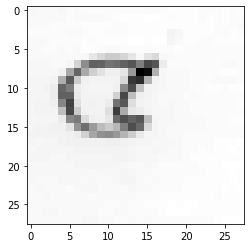

In [ ]:
#plotting image
show_img = fullDataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

### Setting-1  : 

- **totaldata:** 54908
- **minibatch:** 100
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{54908}{100} = 5.46 $
- **Learning rate:** 0.1
- **Optimizer:** SGD
- **No. of hidden layer neurons :** 100
-**No of hidden layers :** 1
- **Activation function :** Tanh

In [ ]:
# Hyperparameters

batch_size = 100
num_iters = 3000
input_dim = 28*28 # num_features = 784
num_hidden = 100 # num of hidden nodes
output_dim = 10

learning_rate = 0.1  

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

### Designing the Model using class

In [ ]:
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)

        ### Non-linearity
        self.sigmoid = nn.Sigmoid()

        ### Output layer
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.sigmoid(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

NeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (sigmoid): Sigmoid()
  (linear_out): Linear(in_features=100, out_features=10, bias=True)
)

###Constructing loss and optimizer (select from PyTorch API)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training: forward, loss, backward, step

In [ ]:
'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2711846828460693. Accuracy: 17.282826443270807
Iteration: 1000. Loss: 2.1721439361572266. Accuracy: 25.587324713167
Iteration: 1500. Loss: 2.06144642829895. Accuracy: 23.638681478783464
Iteration: 2000. Loss: 2.1383919715881348. Accuracy: 26.680021853942815
Iteration: 2500. Loss: 1.9761675596237183. Accuracy: 32.30741212893826


### Setting-2  : 

- **totaldata:** 54908
- **minibatch:** 256
- **iterations:** 3,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{54908}{256} = 13.98 $
- **Learning rate:** 0.1
- **Optimizer:** Adam
- **No. of hidden layer neurons :** 256
-**No of hidden layers :** 2
- **Activation function :** Tanh -> ReLU6

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 256
num_iters = 3000
input_dim = 28*28 # num_features = 784
num_hidden = 256
output_dim = 10

learning_rate = 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from sklearn.utils import shuffle
fullDataset = shuffle(fullDataset)
train_dataset, test_dataset = train_test_split(fullDataset, test_size = 0.1)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.tanh_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.tanh_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9613882303237915. Accuracy: 36.987798215261336
Iteration: 1000. Loss: 1.6332391500473022. Accuracy: 47.149881624476414
Iteration: 1500. Loss: 1.4556785821914673. Accuracy: 50.391549808778
Iteration: 2000. Loss: 1.0802658796310425. Accuracy: 55.29047532325624
Iteration: 2500. Loss: 1.1920934915542603. Accuracy: 63.92278273538518


### Setting-3  : 

- **totaldata:** 54908
- **minibatch:** 526
- **iterations:** 5,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 5000 \div \frac{54908}{526} = 47.89 $
- **Learning rate:** 0.0005
- **Optimizer:** Adam
- **No. of hidden layer neurons :** 128 -> 64
-**No of hidden layers :** 2
- **Activation function :** ReLU6 -> Relu

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 526
num_iters = 5000
input_dim = 28*28 # num_features = 784
num_hidden = 128
output_dim = 10

learning_rate = 0.0005

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from sklearn.utils import shuffle
fullDataset = shuffle(fullDataset)
train_dataset, test_dataset = train_test_split(fullDataset, test_size = 0.1)


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()

        ### 2nd hidden layer: 128 --> 64
        self.linear_2 = nn.Linear(num_hidden, 64)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### Output layer: 64 --> 10
        self.linear_out = nn.Linear(64, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.7299050092697144. Accuracy: 43.87179020214897
Iteration: 1000. Loss: 1.3950589895248413. Accuracy: 54.9080313239847
Iteration: 1500. Loss: 1.1224157810211182. Accuracy: 62.11983245310508
Iteration: 2000. Loss: 0.9529989957809448. Accuracy: 66.21744673101439
Iteration: 2500. Loss: 0.8917745351791382. Accuracy: 69.36805682025133
Iteration: 3000. Loss: 0.9308397769927979. Accuracy: 70.78856310325988
Iteration: 3500. Loss: 0.7980701327323914. Accuracy: 70.69750500819522
Iteration: 4000. Loss: 0.6663817167282104. Accuracy: 73.53851757421235
Iteration: 4500. Loss: 0.6488248705863953. Accuracy: 76.19741395010017


### Setting-4  : 

- **totaldata:** 54908
- **minibatch:** 1024
- **iterations:** 10,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 10000 \div \frac{54908}{1024} = 186.49 $
- **Learning rate:** 0.0005
- **Optimizer:** Adamax
- **No. of hidden layer neurons :** 256 -> 256 -> 128
-**No of hidden layers :** 3
- **Activation function :** Tanh, ReLU6, ReLU6

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 1024
num_iters = 10000
input_dim = 28*28 # num_features = 784
num_hidden = 256
output_dim = 10

learning_rate = 0.0005

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from sklearn.utils import shuffle
fullDataset = shuffle(fullDataset)
train_dataset, test_dataset = train_test_split(fullDataset, test_size = 0.1)


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.tanh_1= nn.Tanh()

        ### 2nd hidden layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2= nn.ReLU6()

        ### 3rd hidden layer
        self.linear_3 = nn.Linear(num_hidden, 128)
        self.relu_3= nn.ReLU6()

        ### Output layer
        self.linear_out = nn.Linear(128, num_classes)

    def forward(self, x):
        # Linear layer
        out  = self.linear_1(x)
        # Non-linearity
        out = self.tanh_1(out)

        # Linear layer
        out  = self.linear_2 (out)
        # Non-linearity
        out = self.relu_2(out)

        out  = self.linear_3 (out)
        # Non-linearity
        out = self.relu_3(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

model = NeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8648245334625244. Accuracy: 40.72118011291204
Iteration: 1000. Loss: 1.5228160619735718. Accuracy: 50.173010380622834
Iteration: 1500. Loss: 1.2551831007003784. Accuracy: 59.22418503004917
Iteration: 2000. Loss: 1.070210576057434. Accuracy: 63.13968311782917
Iteration: 2500. Loss: 0.9519976377487183. Accuracy: 67.05518120560917
Iteration: 3000. Loss: 0.9001961946487427. Accuracy: 70.22400291385904
Iteration: 3500. Loss: 0.7997441291809082. Accuracy: 72.88289928974686
Iteration: 4000. Loss: 0.761428952217102. Accuracy: 74.88617738116919
Iteration: 4500. Loss: 0.6848440766334534. Accuracy: 76.3431069022036
Iteration: 5000. Loss: 0.661502480506897. Accuracy: 77.16262975778547
Iteration: 5500. Loss: 0.6254251003265381. Accuracy: 77.52686213804407
Iteration: 6000. Loss: 0.5583562850952148. Accuracy: 79.58477508650519
Iteration: 6500. Loss: 0.5949784517288208. Accuracy: 79.96721908577672
Iteration: 7000. Loss: 0.540980339050293. Accuracy: 80.85958841741031
Iteration: 